<a href="https://colab.research.google.com/github/MOUNESH-M/crop-disease-detection-ai/blob/main/Crop_Disease_Detection_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# uploading kaggle.json(kaggle API Token) in colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mouneshm","key":"2118a5f94a429d4d8e94849c62528240"}'}

In [3]:
#configuring kaggle CLI
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Downloading Dataset
!kaggle datasets download -d emmarex/plantdisease
!unzip plantdisease.zip -d plant_disease_dataset

Streaming output truncated to the last 5000 lines.
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf__

In [5]:
#Exploring the Dataset
import os
base_dir = 'plant_disease_dataset'
for folder in os.listdir(base_dir):
  print(folder)

PlantVillage
plantvillage


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


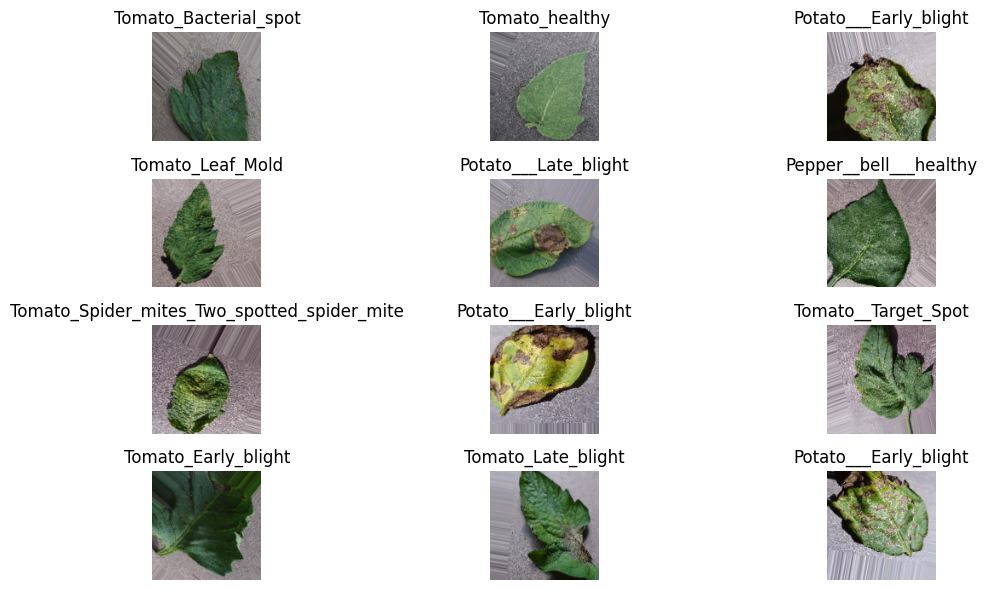

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

data_dir='plant_disease_dataset/PlantVillage'
IMG_SIZE=(128,128)
BATCH_SIZE=32
#Creating a image generator with desired agumentation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2)

#Loading and augumenting the images form the dataset for training set
train_generator=train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True)

#for validation set
validation_generator=train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True)

#Visualizing the sampels
class_names=list(train_generator.class_indices.keys())
x_batch,y_batch=next(train_generator)
plt.figure(figsize=(12,6))
for i in range(12):
  plt.subplot(4,3,i+1)
  plt.imshow(x_batch[i])
  label=class_names[y_batch[i].argmax()]
  plt.title(label)
  plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

#building the CNN Model
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes,activation='softmax')
])

#Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Training the Model
EPOCHS=20

history=model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 105s 196ms/step - accuracy: 0.3085 - loss: 2.1547 - val_accuracy: 0.6572 - val_loss: 1.0193
Epoch 2/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 101s 195ms/step - accuracy: 0.6441 - loss: 1.0514 - val_accuracy: 0.6356 - val_loss: 1.0623
Epoch 3/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 100s 194ms/step - accuracy: 0.7097 - loss: 0.8696 - val_accuracy: 0.7535 - val_loss: 0.7199
Epoch 4/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 100s 194ms/step - accuracy: 0.7477 - loss: 0.7404 - val_accuracy: 0.8328 - val_loss: 0.5006
Epoch 5/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 100s 193ms/step - accuracy: 0.7952 - loss: 0.5893 - val_accuracy: 0.8372 - val_loss: 0.4880
Epoch 6/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 101s 195ms/step - accuracy: 0.8074 - loss: 0.5561 - val_accuracy: 0.8472 - val_loss: 0.4525
Epoch 7/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 101s 196ms/step - accuracy: 0.8223 - loss: 0.5073 - val_accuracy: 0.8610 - val_loss: 0.4088
Epoch 8/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 101s 195ms/step - accuracy: 0.8488 -

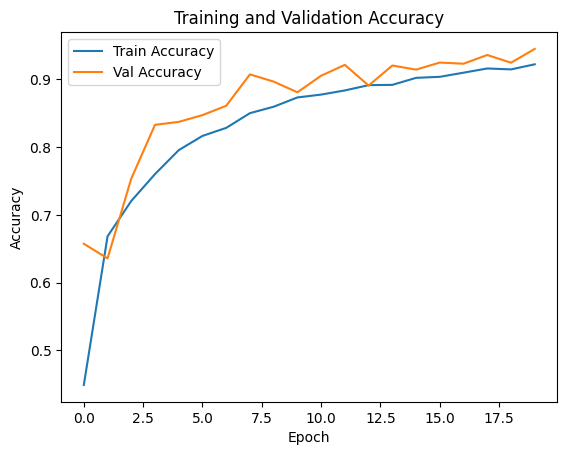

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [13]:
#save the model
model.save('/content/drive/MyDrive/plant_disease_cnn_model.keras')